In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df=pd.read_csv("Student_performance_data.csv")
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [8]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

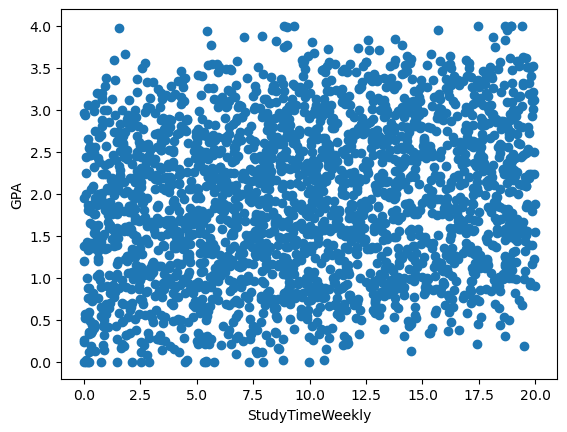

In [10]:
plt.scatter(df['StudyTimeWeekly'],df['GPA'])
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GPA')
plt.show()

In [20]:
corr = df.corr(numeric_only=True)
gpa_corr=corr['GPA'].sort_values(ascending=False)
gpa_corr


GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64

In [100]:
x=df[['ParentalSupport','StudyTimeWeekly','Tutoring','Extracurricular','Music','GradeClass','Absences','ParentalEducation','Gender']]
y=df['GPA']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [102]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(x_test)

In [104]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.1686773906992036
MSE: 0.04399671958956356
RMSE: 0.2097539501167107
R² Score: 0.949737063940361
